### Eda de peliculas

In [41]:
# Importar librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
# importar datos de peliculas desde url
url = 'https://raw.githubusercontent.com/diegomaneyro/API_ML/main/peliculas_final.csv'

datos = pd.read_csv(url)  

In [19]:
datos.head()

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type,score
0,as1,amazon,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,113,min,3
1,as2,amazon,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,110,min,3
2,as3,amazon,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,74,min,3
3,as4,amazon,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",69,min,3
4,as5,amazon,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45 min,"drama, fantasy",teenage matt banting wants to work with a famo...,45,min,3


In [44]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             22998 non-null  object
 1   plataforma     22998 non-null  object
 2   type           22998 non-null  object
 3   title          22998 non-null  object
 4   director       14739 non-null  object
 5   cast           17677 non-null  object
 6   country        11110 non-null  object
 7   date_added     13444 non-null  object
 8   release_year   22998 non-null  int64 
 9   rating         22998 non-null  object
 10  duration       22516 non-null  object
 11  listed_in      22998 non-null  object
 12  description    22994 non-null  object
 13  duration_int   22998 non-null  int64 
 14  duration_type  22998 non-null  object
 15  score          22998 non-null  int64 
dtypes: int64(3), object(13)
memory usage: 2.8+ MB


In [45]:
datos.describe()

,release_year,duration_int,score
count,22998.000000,22998.000000,22998.0
mean,2010.811244,34.489912,3.0
std,15.401142,50.086833,0.0
min,1920.000000,0.000000,3.0
25%,2010.000000,0.000000,3.0
50%,2016.000000,0.000000,3.0
75%,2019.000000,83.000000,3.0
max,2021.000000,601.000000,3.0


### Correlacion entre variables

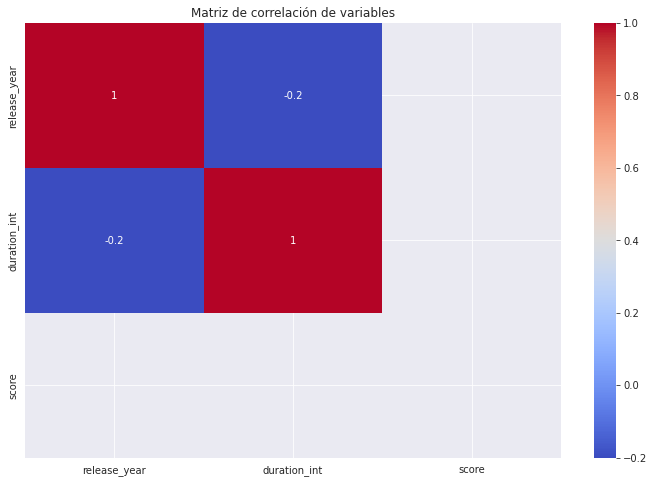

In [24]:
# correlacion de vaiables del dataset de peliculas
correlaciones = datos.corr()
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de variables')
plt.show()


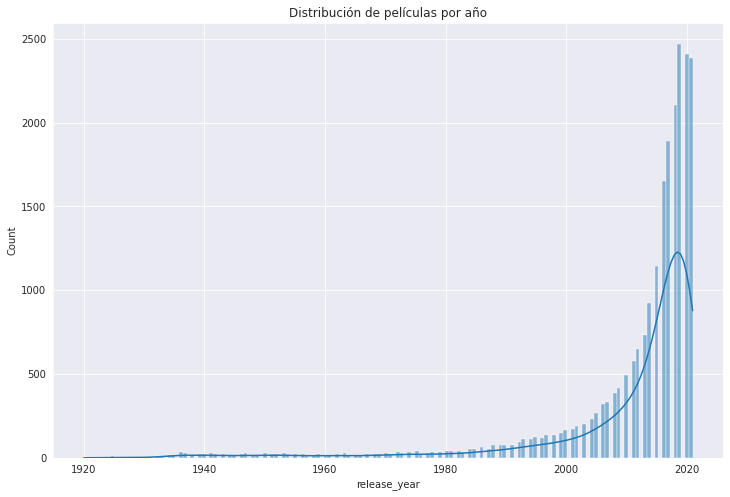

In [47]:
# histograma de año de lamzamiento y tiempo de duracion
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')
sns.histplot(data=datos, x='release_year', kde=True)
plt.title('Distribución de películas por año')
plt.show()

### Busqueda de outliers

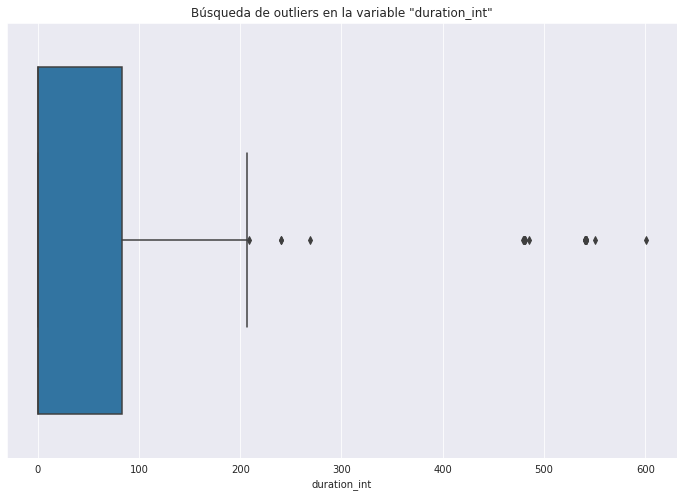

In [48]:
# buscar outliers en la variable score
variable = 'duration_int'
sns.boxplot(x=datos[variable])
plt.title('Búsqueda de outliers en la variable "{}"'.format(variable))
plt.show()


#### se observan outliers que pasan los 400 minutos de duracion, los separo en un dataframe, organizado por id de pelicula, titulo y tiempo de duracion

In [49]:
# peliculas_outliers con tiempo de duracion mayor a 400 minutos
filtro = datos['duration_int'] > 400
titulos = datos.loc[filtro, ['title', 'duration_int']]

titulos.head()


,title,duration_int
147,waterfalls for sleep 8 hours,480
933,soothing surf at del norte for sleep black screen,601
934,soothing surf at carmel beach for sleep,480
1672,midnight waterfalls for sleep 8 hours,480
1673,midnight thunderstorm for sleep 9 hours,541


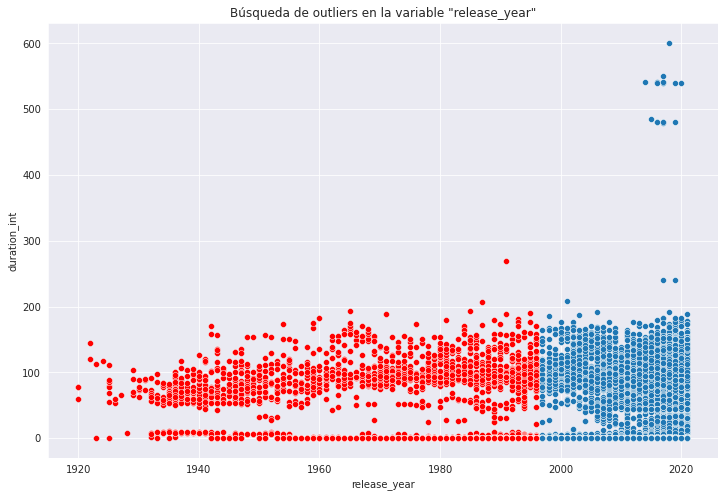

In [50]:
# Crear un subconjunto con las variables "release_year" y "duration_int"
subconjunto = datos[['release_year', 'duration_int']]

# Identificar los outliers en la variable "release_year" utilizando el método IQR
Q1 = subconjunto['release_year'].quantile(0.25)
Q3 = subconjunto['release_year'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = subconjunto[(subconjunto['release_year'] < limite_inferior) | (subconjunto['release_year'] > limite_superior)]

# Graficar los outliers utilizando una gráfica de dispersión
sns.scatterplot(data=subconjunto, x='release_year', y='duration_int')
sns.scatterplot(data=outliers, x='release_year', y='duration_int', color='red')
plt.title('Búsqueda de outliers en la variable "release_year"')
plt.show()
